## Grab Cut for Interactive Foreground Extraction

**Act 3**

_Oct 23 - _

### Background

Like I mentioned earlier, the thresholding methods such as `yen` and `otsu` work but very poorly and unpredictably. To solve this once and for all, I am working on using [Grab Cut][1] algorithm in OpenCV.

The interactive part is the scribbly mask that one must provide to the method which is then used for differentiating foreground from background. This mask is currently provided externally but I'd work on some JS based Canvas app which could be used to do this in a much user-friendly way.

[1]: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html

In [1]:
# Get required stuff here

%matplotlib inline

import skimage
import skimage.io
import skimage.morphology
import skimage.filters
import skimage.color
import skimage.segmentation
import skimage.util
import skimage.util.colormap

import matplotlib.pyplot as plt
import numpy as np
import os
import glob

import cv2

from collections import namedtuple

In [2]:
## Bring back some handy methods defined earlier.
root_images = namedtuple('RootImages', ['root', 'grey', 'bin', 'name', 'thin'])

def get_image(path):
  '''Return tuple of pre-processed image.'''
  root = skimage.io.imread(path)
  grey = skimage.color.rgb2gray(root)
  
  # Using `yen` thresholds.
  threshold = skimage.filters.threshold_otsu(grey)
  binary = grey < threshold

  # Get the thin axis morphology of the image as well.
  thin = skimage.morphology.thin(binary)
  return root_images(root, grey, binary, os.path.basename(path), thin)

In [ ]:
def grab_cut_rect(img, rect):
  '''Use open-cv Grab Cut for extracting foreground.
  
  Args:
  - img: Image array
  '''
  mask = np.zeros(img.shape[:2], np.uint8)
  bgdModel = np.zeros((1,65), np.float64)
  fgdModel = np.zeros((1,65), np.float64)
  

  cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
  mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
  return img * mask2[:,:,np.newaxis]


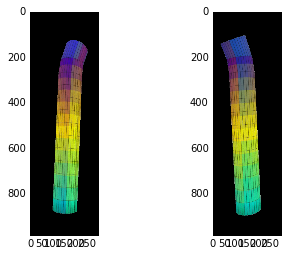

In [74]:
rect = (30, 30, 240, 900)
plt.subplot(121)
plt.imshow(grab_cut_rect(skimage.io.imread('tmp/extras/0053.jpg'), rect))
plt.subplot(122)
plt.imshow(grab_cut_rect(skimage.io.imread('tmp/extras/0224.jpg'), rect))

In [72]:
rect2 = (350, 25, 700, 550)
im2 = skimage.io.imread('tmp/extras/0071.png')[:,:,:3]

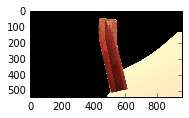

In [73]:
plt.subplot(121)
plt.imshow(grab_cut_rect(im2, rect2))